In [7]:
import numpy as np

def coin_experiment():
    num_coins = 1000
    num_flips = 10

    # Initialize arrays to store the results
    results = np.zeros((num_coins, num_flips))
    proportions = np.zeros((num_coins))

    for i in range(num_coins):
        # Flip the coin num_flips times
        flips = np.random.choice([0, 1], size=num_flips)
        results[i] = flips

        # Calculate the proportion of heads
        proportion_heads = np.mean(flips)
        proportions[i] = proportion_heads

    # Calculate the proportion of heads for the first coin
    nu1 = proportions[0]

    # Calculate the proportion of heads for a randomly chosen coin
    nu_r = np.random.choice(proportions)

    # Calculate the proportion of heads for the coin that came up heads the least
    nu_min = np.min(proportions)

    return nu1, nu_r, nu_min


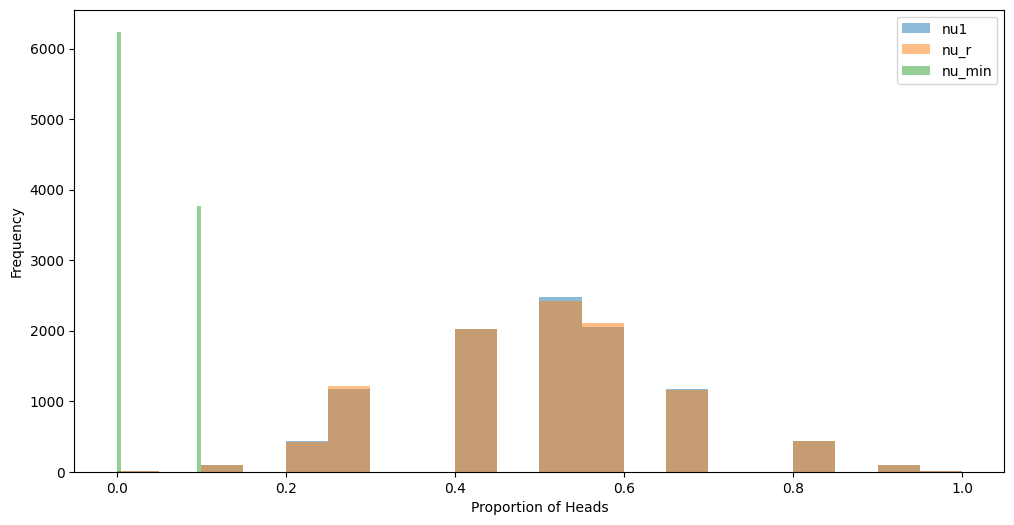

In [9]:
import matplotlib.pyplot as plt

def repeat_experiment(num_repeats):
    nu1_values = np.zeros((num_repeats))
    nu_r_values = np.zeros((num_repeats))
    nu_min_values = np.zeros((num_repeats))

    for i in range(num_repeats):
        nu1, nu_r, nu_min = coin_experiment()
        nu1_values[i] = nu1
        nu_r_values[i] = nu_r
        nu_min_values[i] = nu_min

    # Plot the histograms
    plt.figure(figsize=(12, 6))
    plt.hist(nu1_values, bins=20, alpha=0.5, label='nu1')
    plt.hist(nu_r_values, bins=20, alpha=0.5, label='nu_r')
    plt.hist(nu_min_values, bins=20, alpha=0.5, label='nu_min')
    plt.xlabel('Proportion of Heads')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

repeat_experiment(10000)


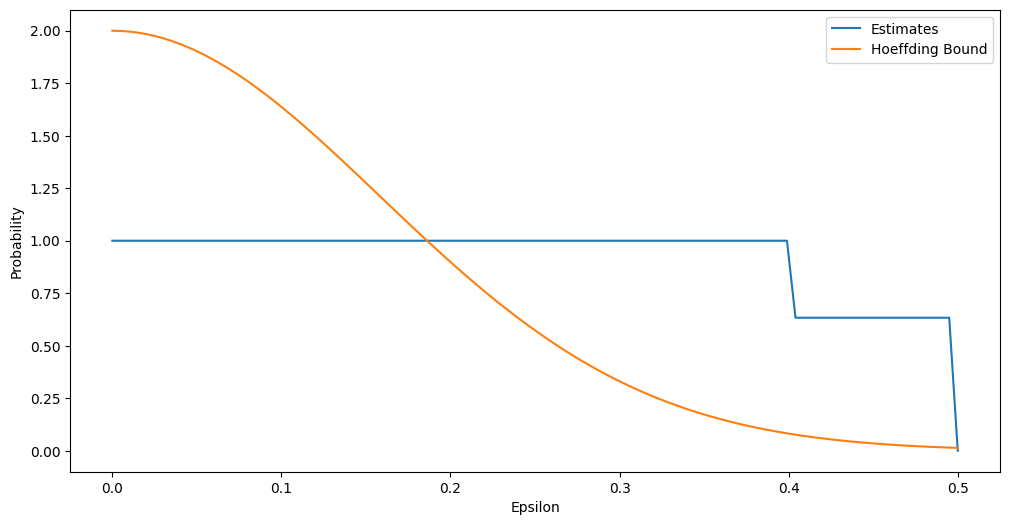

In [10]:
def calculate_hoeffding_bound(epsilon, num_flips):
    return 2 * np.exp(-2 * epsilon**2 * num_flips)

def plot_hoeffding_bound(num_repeats):
    epsilons = np.linspace(0, 0.5, 100)
    hoeffding_bounds = calculate_hoeffding_bound(epsilons, num_flips=10)

    nu_values = np.zeros((num_repeats))
    hoeffding_estimates = np.zeros_like(epsilons)

    for i in range(num_repeats):
        nu1, nu_r, nu_min = coin_experiment()
        nu_values[i] = nu_min

        for j, epsilon in enumerate(epsilons):
            if abs(nu_min - 0.5) > epsilon:
                hoeffding_estimates[j] += 1

    # Normalize the estimates
    hoeffding_estimates /= num_repeats

    # Plot the estimates and the Hoeffding bound
    plt.figure(figsize=(12, 6))
    plt.plot(epsilons, hoeffding_estimates, label='Estimates')
    plt.plot(epsilons, hoeffding_bounds, label='Hoeffding Bound')
    plt.xlabel('Epsilon')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

plot_hoeffding_bound(10000)
